### Линейная регрессия

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
#help(mean_squared_error)


plt.style.use('ggplot')
np.random.seed(160920)

#### Простой пример, как обучить модель линейной регрессии в Sklearn

Загрузим готовый набор данных :) Разделим выборку на тестовую и обучающую части.

Инициализируем модель, обучим параметры и посмотрим прогноз.

In [4]:
X, y = load_boston(return_X_y=True) 

In [5]:
lr = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regression = lr.fit(X_train, y_train)
prediction = regression.predict(X_test)

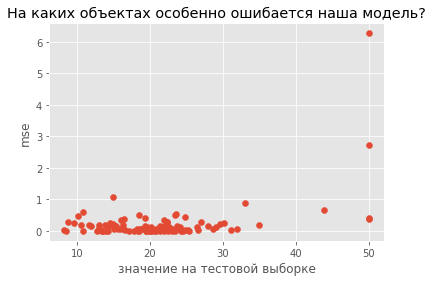

In [6]:
plt.scatter(y_test, (y_test-prediction)**2/len(y_test))
plt.xlabel('значение на тестовой выборке')
plt.ylabel('mse')
plt.title('На каких объектах особенно ошибается наша модель?')
plt.show()

#### Создать класс для ridge регрессии, используя аналитическую формулу

In [7]:
class RidgeRegression():
    def __init__(self, alpha=0, w=0):
        self.alpha = alpha 
        self.w = w
    
    def fit(self, X, y):
        coef_matrix = np.diag(np.repeat(self.alpha, X.shape[1]))
        print(y.shape)
        self.w = np.linalg.inv((X.T.dot(X)) + coef_matrix).dot(X.T).dot(y)
        
        return self
    
    def predict(self, X):
        return X.dot(self.w)
    

#### Реализовать класс с нормализацией данных

In [8]:
class our_standard_scaler():
    def __init__(self, is_mean=True):
        self.is_mean = is_mean
    
    def fit(self, X):
        self.mu = X.mean(axis=0)
        self.sigma = X.std(axis=0)
        return self
        
    def transform(self, X):
        if self.is_mean:
            return (X - self.mu)/self.sigma
        else:
            return X/self.sigma

In [9]:
x = np.array([[1, 2, 3],
             [2, 3, 4]])

our_sc = our_standard_scaler()
scaler = our_sc.fit(x)
scaler.transform(x)

array([[-1., -1., -1.],
       [ 1.,  1.,  1.]])

In [10]:
# для сравнения
from sklearn.preprocessing import StandardScaler

not_our_sc = StandardScaler()
scaler2 = not_our_sc.fit(x)
scaler2.transform(x)

array([[-1., -1., -1.],
       [ 1.,  1.,  1.]])

#### Посмотреть, как работают полиномиальные признаки и как они могут усложнить модель :)

In [11]:
np.random.seed(23092020)

# какие-то реальные данные
x_test = np.linspace(0, 1, 100)
y_test = np.cos(1.5 * np.pi * x_test)

# создадим обучаюшую выборку
x_objects = np.random.uniform(0, 1, size=100)
y_objects = np.cos(1.5 * np.pi * x_objects) + np.random.normal(scale=0.1, size=x_objects.shape[0])

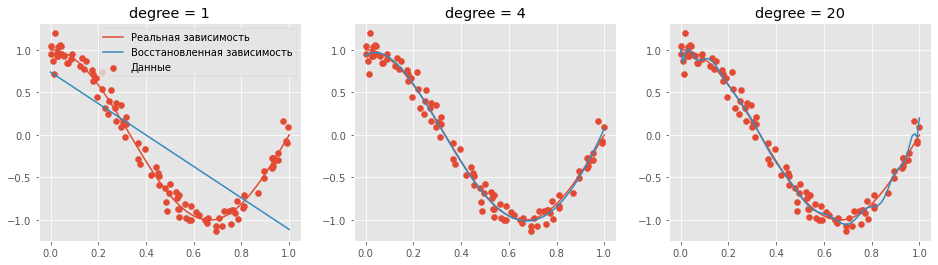

In [12]:
from sklearn.preprocessing import PolynomialFeatures


fig, axs = plt.subplots(figsize=(16, 4), ncols=3)
for i, degree in enumerate([1, 4, 20]):
    X_objects = PolynomialFeatures(degree, include_bias=False).fit_transform(x_objects[:, None])
    X_test = PolynomialFeatures(degree, include_bias=False).fit_transform(x_test[:, None])
    regr = linear_model.LinearRegression().fit(X_objects, y_objects)
    y_pred = regr.predict(X_test)
    axs[i].plot(x_test, y_test, label='Реальная зависимость')
    axs[i].plot(x_test, y_pred, label='Восстановленная зависимость')
    axs[i].scatter(x_objects, y_objects, label='Данные')
    
    if i ==0:
        axs[i].legend()
    axs[i].set_title("degree = %d" % degree)    
    
 # y_pred = a1 * x_1 + a2*x_1**2 + a3*x_1**3 + ......    (до 4 и до 20)

In [13]:
X_test #последний — с 20 признаками

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.01010101e-02, 1.02030405e-04, 1.03061015e-06, ...,
        1.19830259e-36, 1.21040665e-38, 1.22263298e-40],
       [2.02020202e-02, 4.08121620e-04, 8.24488122e-06, ...,
        3.14127834e-31, 6.34601684e-33, 1.28202360e-34],
       ...,
       [9.79797980e-01, 9.60004081e-01, 9.40610059e-01, ...,
        6.92560494e-01, 6.78569373e-01, 6.64860900e-01],
       [9.89898990e-01, 9.79900010e-01, 9.70002030e-01, ...,
        8.32982466e-01, 8.24568502e-01, 8.16239527e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

#### Проверить работоспособность нашей функции для ridge-регрессии и сравнить с готовой реализацией

In [14]:
# data
X_objects = PolynomialFeatures(20, include_bias=False).fit_transform(x_objects[:, None])
X_test = PolynomialFeatures(20, include_bias=False).fit_transform(x_test[:, None])
X_objects_with_const = PolynomialFeatures(20, include_bias=True).fit_transform(x_objects[:, None])
X_test_with_const = PolynomialFeatures(20, include_bias=True).fit_transform(x_test[:, None])

(100,)


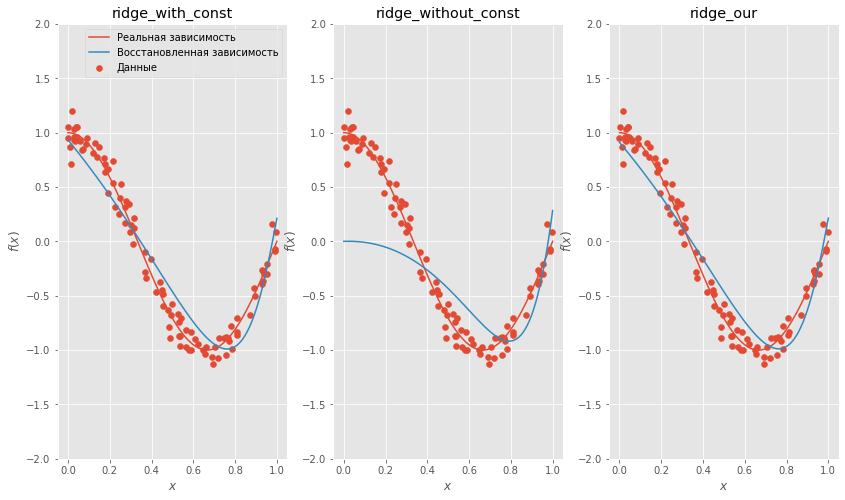

In [15]:
models = dict(ridge_with_const =linear_model.Ridge(alpha=0.6),
              ridge_without_const = linear_model.Ridge(alpha=0.6, fit_intercept=False),
             ridge_our = RidgeRegression(alpha=0.6)) #наша тоже без константы
i = 0
fig, ax = plt.subplots(figsize=(14, 8), ncols=3)
for name, mdls in models.items():
    if name == 'ridge_without_const':
        mdls.fit(X_objects, y_objects)
        y_pred = mdls.predict(X_test)
    else:
        mdls.fit(X_objects_with_const, y_objects)
        y_pred = mdls.predict(X_test_with_const)
    ax[i].plot(x_test, y_test, label="Реальная зависимость")
    ax[i].scatter(x_objects, y_objects, label="Данные")
    ax[i].plot(x_test, y_pred, label="Восстановленная зависимость")
    ax[i].set_title(name)
    ax[i].set_xlabel('X')
    ax[i].set_ylabel('y')
    if i == 0:
        ax[i].legend() 
    ax[i].set_xlabel("$x$")
    ax[i].set_ylabel("$f(x)$")
    ax[i].set_ylim(-2, 2)

    i+=1
plt.show()